## DECISION TREE

In [1]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
#import sexmachine.detector as gender
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline 

Öğrenme Eğrisi için Fonksiyon

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Confusion Matrix çizmek için Fonksiyon

In [4]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ROC eğrisini çizmek için fonksiyon

In [5]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [6]:
print("Veri Seti Okunuyor.....\n")
genuine_users = pd.read_csv(r"C:\Users\Asus\Desktop\users.csv")
fake_users = pd.read_csv(r"C:\Users\Asus\Desktop\fusers.csv")
print("Gerçek Kullanıcı sütunları")
print(genuine_users.columns)
print("Gerçek Kullanıcı")
print(genuine_users.describe())
print("Sahte Kullanıcı")
print(fake_users.describe())
print(genuine_users)
x=pd.concat([genuine_users,fake_users], ignore_index=True)
print(len(x))
##genuine kadar 0 ve fake kadar 1 
y=len(fake_users)*[0] + len(genuine_users)*[1]



Veri Seti Okunuyor.....

Gerçek Kullanıcı sütunları
Index([u'id', u'name', u'screen_name', u'statuses_count', u'followers_count',
       u'friends_count', u'favourites_count', u'listed_count', u'created_at',
       u'url', u'lang', u'time_zone', u'location', u'default_profile',
       u'default_profile_image', u'geo_enabled', u'profile_image_url',
       u'profile_banner_url', u'profile_use_background_image',
       u'profile_background_image_url_https', u'profile_text_color',
       u'profile_image_url_https', u'profile_sidebar_border_color',
       u'profile_background_tile', u'profile_sidebar_fill_color',
       u'profile_background_image_url', u'profile_background_color',
       u'profile_link_color', u'utc_offset', u'protected', u'verified',
       u'description', u'updated', u'dataset'],
      dtype='object')
Gerçek Kullanıcı
                 id  statuses_count  followers_count  friends_count  \
count  1.481000e+03     1481.000000      1481.000000    1481.000000   
mean   4.00043

In [7]:
print(x.columns)

Index([u'id', u'name', u'screen_name', u'statuses_count', u'followers_count',
       u'friends_count', u'favourites_count', u'listed_count', u'created_at',
       u'url', u'lang', u'time_zone', u'location', u'default_profile',
       u'default_profile_image', u'geo_enabled', u'profile_image_url',
       u'profile_banner_url', u'profile_use_background_image',
       u'profile_background_image_url_https', u'profile_text_color',
       u'profile_image_url_https', u'profile_sidebar_border_color',
       u'profile_background_tile', u'profile_sidebar_fill_color',
       u'profile_background_image_url', u'profile_background_color',
       u'profile_link_color', u'utc_offset', u'protected', u'verified',
       u'description', u'updated', u'dataset'],
      dtype='object')


In [8]:
print(len(x))
df = pd.DataFrame(x)
print (df)
print (df.dtypes)
df.fillna(0)

2818
              id                 name      screen_name  statuses_count  \
0        3610511     Davide Dellacasa           braddd           20370   
1        5656162       Simone Economo            eKoeS            3131   
2        5682702               tacone          tacone_            4024   
3        6067292             alesaura         alesstar           40586   
4        6015122               Angelo       PerDiletto            2016   
5        6140012     CRISTIAN PAOLINI         crispaol            3603   
6        6134312                 tmpx             tmpx            1183   
7        6684602                 igor           Igor99            6194   
8        7046912     Marco Massarotto  marcomassarotto           10962   
9        7470952       Antonio Parisi   personanormale           10947   
10       8072492      alessandra elle   alessandraelle            2754   
11       8291932              Mackley          mackley           26713   
12       8858022     Pasquale Val

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,0.0,0.0,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,0.0,0.0,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,0.0,0.0,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,0.0,0.0,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,0.0,0.0,Je me souviens,2015-02-14 10:54:49,E13
5,6140012,CRISTIAN PAOLINI,crispaol,3603,138,179,53,1,Fri May 18 15:16:20 +0000 2007,0,...,DAECF4,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,3600.0,0.0,0.0,"Swiper non rubare, Swiper non rubare!",2015-02-14 10:54:49,E13
6,6134312,tmpx,tmpx,1183,128,168,2,5,Fri May 18 10:28:11 +0000 2007,0,...,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,3600.0,0.0,0.0,I never saw a wild thing sorry for itself.A sm...,2015-02-14 10:54:49,E13
7,6684602,igor,Igor99,6194,1062,1770,597,5,Fri Jun 08 23:55:44 +0000 2007,0,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,0.0,0.0,La vita è quello che accade mentre sei impegna...,2015-02-14 10:54:49,E13
8,7046912,Marco Massarotto,marcomassarotto,10962,23368,958,590,715,Sun Jun 24 07:49:50 +0000 2007,http://marcomassarotto.com,...,FFFFFF,http://a0.twimg.com/images/themes/theme1/bg.png,10147D,10147E,3600.0,0.0,0.0,Founder e CEO di http://hagakure.it e autore d...,2015-02-14 10:54:49,E13
9,7470952,Antonio Parisi,personanormale,10947,760,712,693,27,Sat Jul 14 13:31:20 +0000 2007,0,...,D8C8BE,http://a0.twimg.com/profile_background_images/...,131516,009999,3600.0,0.0,0.0,"Sono timido come Sushi, pigro come Dado e russ...",2015-02-14 10:54:49,E13


In [9]:
print("Öznitelik Çıkarımı.....\n")


name_list = list(enumerate(np.unique(x['name']))) 
name_dict = { name : i for i, name in name_list }   
x.loc[:,'name_code'] = x['name'].map( lambda x: name_dict[x]).astype(int)    
print(x.loc[:,'name_code'])

screenName_list = list(enumerate(np.unique(x['screen_name']))) 
screenName_dict = { name : i for i, name in screenName_list }   
x.loc[:,'screenName_code'] = x['screen_name'].map( lambda x: screenName_dict[x]).astype(int)    
print(x.loc[:,'screenName_code'])


createdAt_list = list(enumerate(np.unique(x['created_at']))) 
lang_dict = { name : i for i, name in createdAt_list }   
x.loc[:,'createdAt_code'] = x['created_at'].map( lambda x: lang_dict[x]).astype(int)    
print(x.loc[:,'createdAt_code'])

url_list = list(enumerate(np.unique(x['url']))) 
url_dict = { name : i for i, name in url_list }   
x.loc[:,'url_code'] = x['url'].map( lambda x: url_dict[x]).astype(int)    
print(x.loc[:,'url_code'])

time_zone_list = list(enumerate(np.unique(x['time_zone']))) 
time_zone_dict = { name : i for i, name in time_zone_list }   
x.loc[:,'time_zone_code'] = x['time_zone'].map( lambda x: time_zone_dict[x]).astype(int)    
print(x.loc[:,'time_zone_code'])

location_list = list(enumerate(np.unique(x['location']))) 
location_dict = { name : i for i, name in location_list }   
x.loc[:,'location_code'] = x['location'].map( lambda x: location_dict[x]).astype(int)    
print(x.loc[:,'location_code'])


description_list = list(enumerate(np.unique(x['description']))) 
description_dict = { name : i for i, name in description_list }   
x.loc[:,'description_code'] = x['description'].map( lambda x: description_dict[x]).astype(int)    
print(x.loc[:,'description_code'])


updated_list = list(enumerate(np.unique(x['updated']))) 
updated_dict = { name : i for i, name in updated_list }   
x.loc[:,'updated_code'] = x['updated'].map( lambda x: updated_dict[x]).astype(int)    
print(x.loc[:,'updated_code'])

dataset_list = list(enumerate(np.unique(x['dataset']))) 
dataset_dict = { name : i for i, name in dataset_list }   
x.loc[:,'dataset_code'] = x['dataset'].map( lambda x: dataset_dict[x]).astype(int)    
print(x.loc[:,'dataset_code'])





Öznitelik Çıkarımı.....

0        573
1       2251
2       2767
3       2527
4        157
5        327
6       2773
7       2649
8       1603
9        194
10      2528
11      1553
12      1952
13       972
14      2585
15       890
16       760
17       861
18      2519
19      2417
20       886
21      2606
22      2759
23       652
24       846
25      2667
26       114
27      2555
28       821
29      2139
        ... 
2788     626
2789    1488
2790     181
2791    1792
2792     775
2793    1224
2794    1270
2795    1734
2796      19
2797    2516
2798    1143
2799     784
2800     433
2801    1118
2802    2502
2803    1410
2804    1485
2805    1170
2806     564
2807    1443
2808    1308
2809    2364
2810     600
2811    1961
2812     597
2813    2438
2814     528
2815    1714
2816    1095
2817    1004
Name: name_code, Length: 2818, dtype: int32
0       1106
1       1409
2       2626
3        942
4        680
5       1291
6       2671
7        423
8       2075
9       2368
10      

In [10]:
lang_list = list(enumerate(np.unique(x['lang']))) 
##lang kodları sayısallaştırılıyor
print(lang_list)
lang_dict = { name : i for i, name in lang_list }   
print(lang_dict)
x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)    
print(x.loc[:,'lang_code'])




Öznitelik Çıkarımı.....

[(0, 'de'), (1, 'en'), (2, 'es'), (3, 'fr'), (4, 'gl'), (5, 'it'), (6, 'nl'), (7, 'tr')]
{'fr': 3, 'en': 1, 'nl': 6, 'de': 0, 'tr': 7, 'it': 5, 'gl': 4, 'es': 2}
0       5
1       1
2       1
3       1
4       5
5       5
6       1
7       5
8       1
9       5
10      5
11      1
12      5
13      5
14      5
15      5
16      1
17      5
18      5
19      5
20      5
21      1
22      1
23      3
24      1
25      5
26      1
27      5
28      1
29      5
       ..
2788    1
2789    1
2790    1
2791    1
2792    1
2793    1
2794    1
2795    1
2796    1
2797    1
2798    1
2799    1
2800    1
2801    1
2802    1
2803    1
2804    1
2805    1
2806    1
2807    1
2808    1
2809    1
2810    1
2811    1
2812    1
2813    1
2814    1
2815    1
2816    1
2817    1
Name: lang_code, Length: 2818, dtype: int32


In [11]:
feature_columns_to_use=['name_code','screenName_code','statuses_count','followers_count','friends_count','favourites_count',
'listed_count', 'createdAt_code','url_code','lang_code','time_zone_code',
'location_code','default_profile', 'default_profile_image','geo_enabled',
'profile_use_background_image','profile_background_tile','utc_offset',
'protected','verified','updated_code','dataset_code']

feature_columns_to_use=feature_columns_to_use
x=x.loc[:,feature_columns_to_use]
print(x)
df = pd.DataFrame(x)
x=df.fillna(0)
print(x)


      name_code  screenName_code  statuses_count  followers_count  \
0           573             1106           20370             5470   
1          2251             1409            3131              506   
2          2767             2626            4024              264   
3          2527              942           40586              640   
4           157              680            2016               62   
5           327             1291            3603              138   
6          2773             2671            1183              128   
7          2649              423            6194             1062   
8          1603             2075           10962            23368   
9           194             2368           10947              760   
10         2528              936            2754              477   
11         1553             2053           26713             1390   
12         1952             2400            4111              314   
13          972             1603  

      name_code  screenName_code  statuses_count  followers_count  \
0           573             1106           20370             5470   
1          2251             1409            3131              506   
2          2767             2626            4024              264   
3          2527              942           40586              640   
4           157              680            2016               62   
5           327             1291            3603              138   
6          2773             2671            1183              128   
7          2649              423            6194             1062   
8          1603             2075           10962            23368   
9           194             2368           10947              760   
10         2528              936            2754              477   
11         1553             2053           26713             1390   
12         1952             2400            4111              314   
13          972             1603  

In [12]:
print("Veriseti train ve test verisi olarak ayrılıyor...\n")
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

Veriseti train ve test verisi olarak ayrılıyor...



In [13]:
print("Veri seti Eğitiliyor.......\n")
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred =clf.predict(X_test)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feature importance = " + str(feat_importance))

from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from StringIO import StringIO

out = StringIO()
out = export_graphviz(clf, out_file='test')


Veri seti Eğitiliyor.......

feature importance = [0.0104029  0.00639194 0.01075256 0.00997036 0.01000439 0.01257586
 0.0045595  0.01228361 0.00258902 0.00041179 0.00459611 0.00135149
 0.         0.         0.00349009 0.00071262 0.         0.00203753
 0.         0.         0.40654597 0.        ]


In [14]:
print("Eski Test Veriseti Accuracy: ") ,accuracy_score(y_test, y_pred)

Eski Test Veriseti Accuracy:  0.9060283687943262


In [15]:
print("Veri seti Eğitiliyor.......\n")
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred =clf.predict(X_test)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feature importance = " + str(feat_importance))

from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from StringIO import StringIO

out = StringIO()
out = export_graphviz(clf, out_file='test')

Veri seti Eğitiliyor.......

feature importance = [0.01042799 0.00565251 0.00966994 0.01270497 0.01110586 0.00972407
 0.00162739 0.01244321 0.40969061 0.00041179 0.00214544 0.0022388
 0.00059154 0.         0.00331263 0.0015112  0.00059154 0.00482622
 0.         0.         0.         0.        ]


In [16]:
feature_columns_to_use=['name_code','screenName_code','statuses_count','followers_count','friends_count','favourites_count',
'listed_count', 'createdAt_code','url_code']

feature_columns_to_use=feature_columns_to_use
x=x.loc[:,feature_columns_to_use]
print(x)
df = pd.DataFrame(x)
x=df.fillna(0)
print(x)

      name_code  screenName_code  statuses_count  followers_count  \
0           573             1106           20370             5470   
1          2251             1409            3131              506   
2          2767             2626            4024              264   
3          2527              942           40586              640   
4           157              680            2016               62   
5           327             1291            3603              138   
6          2773             2671            1183              128   
7          2649              423            6194             1062   
8          1603             2075           10962            23368   
9           194             2368           10947              760   
10         2528              936            2754              477   
11         1553             2053           26713             1390   
12         1952             2400            4111              314   
13          972             1603  

In [17]:
print("Veriseti train ve test verisi olarak ayrılıyor...\n")
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

Veriseti train ve test verisi olarak ayrılıyor...



In [18]:
print("Veri seti Eğitiliyor.......\n")
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred =clf.predict(X_test)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feature importance = " + str(feat_importance))

from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from StringIO import StringIO

out = StringIO()
out = export_graphviz(clf, out_file='test')

Veri seti Eğitiliyor.......

feature importance = [0.01316724 0.01098192 0.01510721 0.00921828 0.01509116 0.01099618
 0.00361445 0.0106819  0.40981739]


In [19]:
print("Test Veriseti Accuracy: ") ,accuracy_score(y_test, y_pred)

Test Veriseti Accuracy:  0.9202127659574468


Confusion matrix->Normalizasyon Olmadan
[[251  17]
 [ 28 268]]


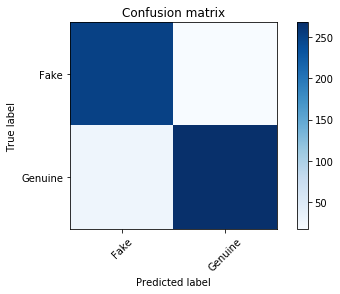

In [20]:
cm=confusion_matrix(y_test, y_pred)
print("Confusion matrix->Normalizasyon Olmadan")
print(cm)
plot_confusion_matrix(cm)

Normalize edilince ->  confusion matrix
[[0.93656716 0.06343284]
 [0.09459459 0.90540541]]


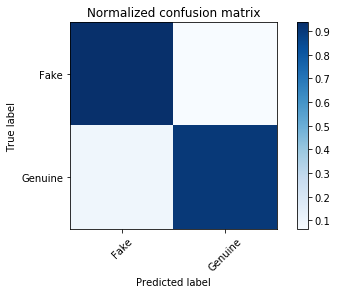

In [21]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalize edilince ->  confusion matrix")
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [22]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.90      0.94      0.92       268
     Genuine       0.94      0.91      0.92       296

   micro avg       0.92      0.92      0.92       564
   macro avg       0.92      0.92      0.92       564
weighted avg       0.92      0.92      0.92       564



('False Positive rate: ', array([0.        , 0.06343284, 1.        ]))
('True Positive rate: ', array([0.        , 0.90540541, 1.        ]))


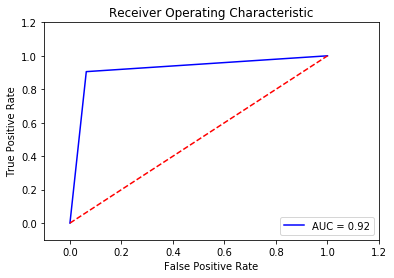

In [23]:
plot_roc_curve(y_test, y_pred)